In [1]:
df = {}

In [2]:
from mlkit.trainer.start import *
from mlkit.vision.data.mnist import MNIST
from mlkit.trainer.apex_trainer import *

def net_fn():
    return nn.Sequential(
        nn.Linear(28 * 28, 300),
        nn.ReLU(),
        nn.Linear(300, 100),
        nn.ReLU(),
        nn.Linear(100, 10),
    )

def opt_fn(net):
    return optim.Adam(net.parameters(), lr=1e-3)

trainer = apex_trainer_mask(
    SimpleTrainer, opt_level='O2'
)(net_fn, opt_fn, 'cuda', F.cross_entropy)

dataset = MNIST('cuda')
df['O2'] = trainer.train(
    FlattenLoader(dataset.train_loader(128)),
    10_000,
    callbacks=trainer.make_default_callbacks() + [
        ValidateCb(FlattenLoader(dataset.test_loader(128)), 1000, keys=['loss', 'acc']),
    ]
)

  0%|          | 1/10000 [00:00<32:00,  5.21it/s, i_ep=0, i_itr=2, loss=2.28, acc=0.198]

Selected optimization level O2:  FP16 training with FP32 batchnorm and FP32 master weights.

Defaults for this optimization level are:
enabled                : True
opt_level              : O2
cast_model_type        : torch.float16
patch_torch_functions  : False
keep_batchnorm_fp32    : True
master_weights         : True
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O2
cast_model_type        : torch.float16
patch_torch_functions  : False
keep_batchnorm_fp32    : True
master_weights         : True
loss_scale             : dynamic


 66%|██████▌   | 6554/10000 [01:18<00:39, 86.32it/s, i_ep=13, i_itr=5999, loss=0.0135, acc=0.996, val_loss=0.0814, val_acc=0.98]  

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 262144.0


 87%|████████▋ | 8680/10000 [01:44<00:14, 88.89it/s, i_ep=18, i_itr=7999, loss=0.0144, acc=0.995, val_loss=0.0922, val_acc=0.98] 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 262144.0


100%|██████████| 10000/10000 [02:01<00:00, 82.61it/s, i_ep=21, i_itr=9999, loss=0.0016, acc=0.999, val_loss=0.0994, val_acc=0.983]


In [3]:
from mlkit.trainer.start import *
from mlkit.vision.data.mnist import MNIST
from mlkit.trainer.apex_trainer import *

def net_fn():
    return nn.Sequential(
        nn.Linear(28 * 28, 300),
        nn.ReLU(),
        nn.Linear(300, 100),
        nn.ReLU(),
        nn.Linear(100, 10),
    )

def opt_fn(net):
    return optim.Adam(net.parameters(), lr=1e-3)

trainer = apex_trainer_mask(
    SimpleTrainer, opt_level='O1'
)(net_fn, opt_fn, 'cuda', F.cross_entropy)

dataset = MNIST('cuda')
df['O1'] = trainer.train(
    FlattenLoader(dataset.train_loader(128)),
    10_000,
    callbacks=trainer.make_default_callbacks() + [
        ValidateCb(FlattenLoader(dataset.test_loader(128)), 1000, keys=['loss', 'acc']),
    ]
)

  0%|          | 10/10000 [00:00<03:11, 52.29it/s, i_ep=0, i_itr=11, loss=2.07, acc=0.513]

Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


 63%|██████▎   | 6287/10000 [01:34<00:52, 70.41it/s, i_ep=13, i_itr=5999, loss=0.00509, acc=0.998, val_loss=0.0876, val_acc=0.979]

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 262144.0


 89%|████████▉ | 8881/10000 [02:13<00:15, 70.03it/s, i_ep=18, i_itr=7999, loss=0.00751, acc=0.998, val_loss=0.0928, val_acc=0.98] 

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 262144.0


100%|██████████| 10000/10000 [02:31<00:00, 66.18it/s, i_ep=21, i_itr=9999, loss=0.00497, acc=0.998, val_loss=0.102, val_acc=0.981]


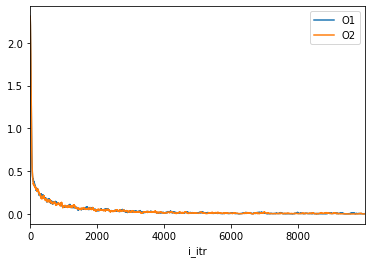

In [4]:
ax = plt.subplot()
df['O1'].plot('i_itr', 'loss', ax=ax, label='O1')
df['O2'].plot('i_itr', 'loss', ax=ax, label='O2')